# Laboratory work 8: boundary-value problem

---

## Work objective:

Solve a boundary-value problem by:

1) shooting method;
2) tridiagonal matrix method.

---

## Shooting method

The example to which this method was applied is an equation describing motion of a particle in
Toda's potential.

\begin{equation*}
    \ddot{x} = 1 - e^x
\end{equation*}

Let's figure out the form of the potential function:

\begin{equation*}
    \ddot{x} = -\frac{1}{m}\frac{dU}{dx} \implies
    \frac{1}{m}\frac{dU}{dx} = e^x - 1
\end{equation*}

If we say that $m = 1$ and omit an arbitrary constant, then:

\begin{equation*}
    U(x) = e^x - x
\end{equation*}

Boundary conditions are:

\begin{equation*}
    x(0) = x(120) = 0,\ \dot{x}(0) = \dot{x}(120) = A,\ A \geq 10
\end{equation*}

We shall find all periodic solutions to this problem.

We have to transform the equation of the 2nd order into a system of equations of the 1st order to be able to apply aforementioned method. It may be done the following way:

\begin{cases}
    \dot{y} = 1 - e^z \\
    \dot{z} = y
\end{cases}

\begin{cases}
    y(0) = y(120) = A \\
    z(0) = z(120) = 0
\end{cases}

The idea of the method is to solve given system of ODE's as an initial-value problem with initial
values $y(0) = A$, $z(0) = 0$ and then vary parameter $A$ to satisfy right border condition
$y(120) = A$, $z(120) = 0$.

---

## Tridiagonal-matrix method

The example to which this method was applied is the following equation:

\begin{equation*}
    y'' - P(x)^2 y = f(x),\ y(0) = y(1),\ P(x)^2\text{ and }f(x)\text{ are periodic}
\end{equation*}

Firstly, let's analyze a more general equation:

\begin{equation*}
    y'' + p(x)y' + q(x)y = f(x),\ y(0) = y(1),\ y(x)\text{ is periodic}
\end{equation*}

Corresponding difference scheme:

\begin{equation*}
    \frac{y_{n + 1} - 2y_n + y_{n - 1}}{h^2} + p_n \frac{y_{n + 1} - y_{n - 1}}{2h} + q_n y_n = f_n,\
    n \in \{0, ..., N - 1\}
\end{equation*}

Equivalent form:

\begin{equation*}
    \left(1 + \frac{hp_n}{2}\right)y_{n + 1} + (h^2q_n - 2)y_n +
    \left(1 - \frac{hp_n}{2}\right)y_{n - 1} = h^2 f_n
\end{equation*}

Because $y(x)$ is a periodical function, $y_N = y_0$. If we assume existence of hypothetical
$y_{-1}$, then $y_{-1} = y_{N - 1}$. Thus, we've got a system:

\begin{cases}
    \left(1 + \frac{hp_0}{2}\right)y_1 + (h^2q_0 - 2)y_0 +
    \left(1 - \frac{hp_0}{2}\right)y_{N - 1} = h^2 f_0 \\

    \left(1 + \frac{hp_n}{2}\right)y_{n + 1} + (h^2q_n - 2)y_n +
    \left(1 - \frac{hp_n}{2}\right)y_{n - 1} = h^2 f_n,\ n \in \{1, ..., N - 2\} \\

    \left(1 + \frac{hp_{N - 1}}{2}\right)y_{0} + (h^2q_{N - 1} - 2)y_{N - 1} +
    \left(1 - \frac{hp_{N - 1}}{2}\right)y_{N - 2} = h^2 f_{N - 1}
\end{cases}

For purposes of brevity, let's introduce some notions:

\begin{equation*}
    a_n = 1 + \frac{hp_n}{2},\ \ b_n = h^2q_n - 2,\ \ c_n = 1 - \frac{hp_n}{2},\ \ d_n = h^2 f_n,\ \
    n \in \{0, ..., N - 1\}
\end{equation*}

Now we rewrite the system using matrices:

\begin{equation*}
    \begin{pmatrix}
           b_0    & a_0 &  0  & ... &     0     &     0     &    c_0    \\
           c_1    & b_1 & a_1 & ... &     0     &     0     &     0     \\
           ...    & ... & ... & ... &    ...    &    ...    &    ...    \\
            0     &  0  &  0  & ... & c_{N - 2} & b_{N - 2} & a_{N - 2} \\
        a_{N - 1} &  0  &  0  & ... &     0     & c_{N - 1} & b_{N - 1}
    \end{pmatrix}
    \begin{pmatrix}
        y_0 \\
        y_1 \\
        ... \\
        y_{N - 2} \\
        y_{N - 1} \\
    \end{pmatrix} =
    \begin{pmatrix}
        d_0 \\
        d_1 \\
        ... \\
        d_{N - 2} \\
        d_{N - 1} \\
    \end{pmatrix}
\end{equation*}

Now we are going to find a way so solve such a system. First of all, let's denote:

\begin{equation*}
    y_n = \alpha_n + \beta_n y_{n + 1} + \gamma_n y_{N - 1},\ n \in \{0, ..., N - 3\}
\end{equation*}

\begin{equation*}
    y_{N - 2} = \alpha_{N - 2} + \gamma_{N - 2} y_{N - 1}
\end{equation*}

Coefficients $\alpha_0$, $\beta_0$ and $\gamma_0$ are easy to find:

\begin{equation*}
    \begin{cases}
        y_0 = \alpha_0 + \beta_0 y_1 + \gamma_0 y_{N - 1} \\
        b_0 y_0 + a_0 y_1 + c_0 y_{N - 1} = d_0
    \end{cases}
    \implies
    \alpha_0 = \frac{d_0}{b_0},\ \beta_0 = -\frac{a_0}{b_0},\ \gamma_0 = -\frac{c_0}{b_0}
\end{equation*}

Let's find other coefficients as well:

\begin{equation*}
    a_n y_{n + 1} + b_n y_n + c_n y_{n - 1} = d_n,\ n \in \{1, ..., N - 2\}
\end{equation*}

\begin{equation*}
    a_n y_{n + 1} + b_n y_n + c_n (\alpha_{n - 1} + \beta_{n - 1} y_n + \gamma_{n - 1} y_{N - 1}) = d_n
\end{equation*}

\begin{equation*}
    (b_n + c_n \beta_{n - 1}) y_n = (d_n - c_n \alpha_{n - 1}) - a_n y_{n + 1} - c_n \gamma_{n - 1} y_{N - 1}
\end{equation*}

\begin{equation*}
    y_n = \frac{d_n - c_n \alpha_{n - 1}}{b_n + c_n \beta_{n - 1}}
          - \frac{a_n}{b_n + c_n \beta_{n - 1}} y_{n + 1}
          - \frac{c_n \gamma_{n - 1}}{b_n + c_n \beta_{n - 1}} y_{N - 1}
\end{equation*}

\begin{equation*}
    \boxed{\alpha_n = \frac{d_n - c_n \alpha_{n - 1}}{b_n + c_n \beta_{n - 1}}}\
    \boxed{\beta_n = -\frac{a_n}{b_n + c_n \beta_{n - 1}}}\
    \boxed{\gamma_n = -\frac{c_n \gamma_{n - 1}}{b_n + c_n \beta_{n - 1}}},\
    n \in \{1, ..., N - 3\}
\end{equation*}

\begin{equation*}
    \boxed{\alpha_{N - 2} = \frac{d_{N - 2} - c_{N - 2} \alpha_{N - 3}}{b_{N - 2} + c_{N - 2} \beta_{N - 3}}}\
    \boxed{\gamma_{N - 2} = -\frac{a_{N - 2} + c_{N - 2} \gamma_{N - 3}}{b_{N - 2} + c_{N - 2} \beta_{N - 3}}}
\end{equation*}

Then, we denote:

\begin{equation*}
    y_n = \nu_n + \mu_n y_0,\ n \in \{0, ..., N - 1\}
\end{equation*}

Let's find these coefficients:

$n = N - 1$:

\begin{equation*}
    a_{N - 1}y_0 + b_{N - 1}y_{N - 1} + c_{N - 1} y_{N - 2} = d_{N - 1}
\end{equation*}

\begin{equation*}
    a_{N - 1}y_0 + b_{N - 1}y_{N - 1} + c_{N - 1}(\alpha_{N - 2} + \gamma_{N - 2} y_{N - 1}) = d_{N - 1}
\end{equation*}

\begin{equation*}
    (b_{N - 1} + c_{N - 1}\gamma_{N - 2}) y_{N - 1} = (d_{N - 1} - c_{N - 1}\alpha_{N - 2}) - a_{N - 1}y_0
\end{equation*}

\begin{equation*}
    \boxed{\nu_{N - 1} = \frac{d_{N - 1} - c_{N - 1}\alpha_{N - 2}}{b_{N - 1} + c_{N - 1}\gamma_{N - 2}}}\
    \boxed{\mu_{N - 1} = -\frac{a_{N - 1}}{b_{N - 1} + c_{N - 1}\gamma_{N - 2}}}
\end{equation*}

$n = N - 2$:

\begin{equation*}
    y_{N - 2} = \alpha_{N - 2} + \gamma_{N - 2} y_{N - 1}
\end{equation*}

\begin{equation*}
    y_{N - 2} = \alpha_{N - 2} + \gamma_{N - 2}(\nu_{N - 1} + \mu_{N - 1}y_0)
\end{equation*}

\begin{equation*}
    y_{N - 2} = (\alpha_{N - 2} + \gamma_{N - 2}\nu_{N - 1}) + \gamma_{N - 2}\mu_{N - 1}y_0
\end{equation*}

\begin{equation*}
    \boxed{\nu_{N - 2} = \alpha_{N - 2} + \gamma_{N - 2}\nu_{N - 1}}\
    \boxed{\mu_{N - 2} = \gamma_{N - 2}\mu_{N - 1}}
\end{equation*}

$n \in \{0, ..., N - 3\}$:

\begin{equation*}
    y_n = \alpha_n + \beta_n y_{n + 1} + \gamma_n y_{N - 1}
\end{equation*}

\begin{equation*}
    y_n = \alpha_n + \beta_n(\nu_{n + 1} + \mu_{n + 1} y_0) + \gamma_n(\nu_{N - 1} + \mu_{N - 1} y_0)
\end{equation*}

\begin{equation*}
    y_n  = (\alpha_n + \beta_n \nu_{n + 1} + \gamma_n \nu_{N - 1}) + (\beta_n \mu_{n + 1} + \gamma_n \mu_{N - 1}) y_0
\end{equation*}

\begin{equation*}
    \boxed{\nu_n = \alpha_n + \beta_n \nu_{n + 1} + \gamma_n \nu_{N - 1}}\
    \boxed{\mu_n = \beta_n \mu_{n + 1} + \gamma_n \mu_{N - 1}}
\end{equation*}

Also:

\begin{equation*}
    y_0 = \nu_0 + \mu_0  y_0
\end{equation*}

\begin{equation*}
    \boxed{y_0 = \frac{\nu_0}{1 - \mu_0}}
\end{equation*}

Our initial problem is characterized by the fact that
$\forall n \in \{0, ..., N\} \hookrightarrow p_n = 0$.

## Imports and stuff

In [10]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning) # shut fsolve up for good

## Common function for drawing plots

In [11]:
def draw(title, x, x_label, y, y_label):

    plt.figure(figsize = (21, 9), dpi = 100)
    plt.title(title, fontsize = 30)

    plt.xlabel(x_label, fontsize = 24)
    plt.xticks(fontsize =  20, ha = "center", va = "top")

    plt.ylabel(y_label, fontsize = 24)
    plt.yticks(fontsize = 20, rotation = 30, ha = "right", va = "top")

    plt.scatter(x, y, s = 5, color = "black")
    plt.plot(x, y, linewidth = 1, color = "black")

    plt.grid (color = "black", linewidth = 0.45, linestyle = "dotted")
    plt.minorticks_on()
    plt.grid (which = "minor", color = "grey", linewidth = 0.25, linestyle = "dashed")

    plt.show()

## Shooting method

### Given boundary-value problem

In [12]:
t_1 = 0
t_2 = 120
x_1 = lambda A: np.array([A[0], 0]) # in general A is np.array so we should take the first element
x_2 = x_1
F = lambda t, x: np.array([1 - np.exp(x[1]), x[0]])

### Solver for intermediate initial-value problem (taken from lab-6)

In [13]:
"""
dx/dt = f(t, x), t in [t_1; t_2], x in R^n
x(t_1) = x_0
-------
N:       number of intervals [t_1; t_2] is divided into
A, B, C: parts of Butcher tableau;
"""
def Explicit_Runge_Kutta(f, x_0, t_1, t_2, N, A, B, C, n_steps):

    order = len(B)
    if order != len(C):
        raise RuntimeError("The size of B-part of Butcher tableau mismatches the size of C-part")
    elif C[0] != 0:
        raise RuntimeError("The first element of C shall equal to 0")
    elif n_steps > N:
        raise RuntimeError("The number of steps has to be not greater than the number of intervals")

    t = np.linspace(t_1, t_2, num = N + 1, endpoint = True)
    dt = (t_2 - t_1) / N

    dim = len(x_0)
    x = np.empty(shape=(n_steps + 1, dim))
    x[0] = x_0

    k = np.empty(shape=(order, dim))

    for n in range(n_steps):
        for i in range(order):
            k[i] = f(t[n] + dt * C[i], x[n] + dt * sum(A[i - 1][j] * k[j] for j in range(i)))
        x[n + 1] = x[n] + sum(B[j] * k[j] for j in range(order)) * dt

    if n_steps < N:
        t = np.resize(t, n_steps)

    return t, x

RK_A = [[0.5],
        [0.0, 0.5],
        [0.0, 0.0, 1.0]]
RK_B = np.array([1.0/6.0, 2.0/6.0, 2.0/6.0, 1.0/6.0])
RK_C = np.array([0.0, 0.5, 0.5, 1.0])

def solve_cauchy(F, x_1, t_1, t_2, N):
    return Explicit_Runge_Kutta(F, x_1, t_1, t_2, N, RK_A, RK_B, RK_C, N)

### Shooting method itself

In [14]:
# difference between the right border condition and initial-value solution on the right border
def shooting_delta(F, solver, t_1, x_1, t_2, x_2, N):

    _, x = solver(F, x_1, t_1, t_2, N)

    return np.linalg.norm(x[x.shape[0] - 1] - np.array(x_2), ord=2)

def shooting_method(F, solver, t_1, x_1, t_2, x_2, N, initial_approx):

    G = lambda A : shooting_delta(F, solver, t_1, x_1(A), t_2, x_2(A), N)
    A = fsolve(G, initial_approx)
    t, x = solver(F, x_1(A), t_1, t_2, N)

    return t, x, A

### Results

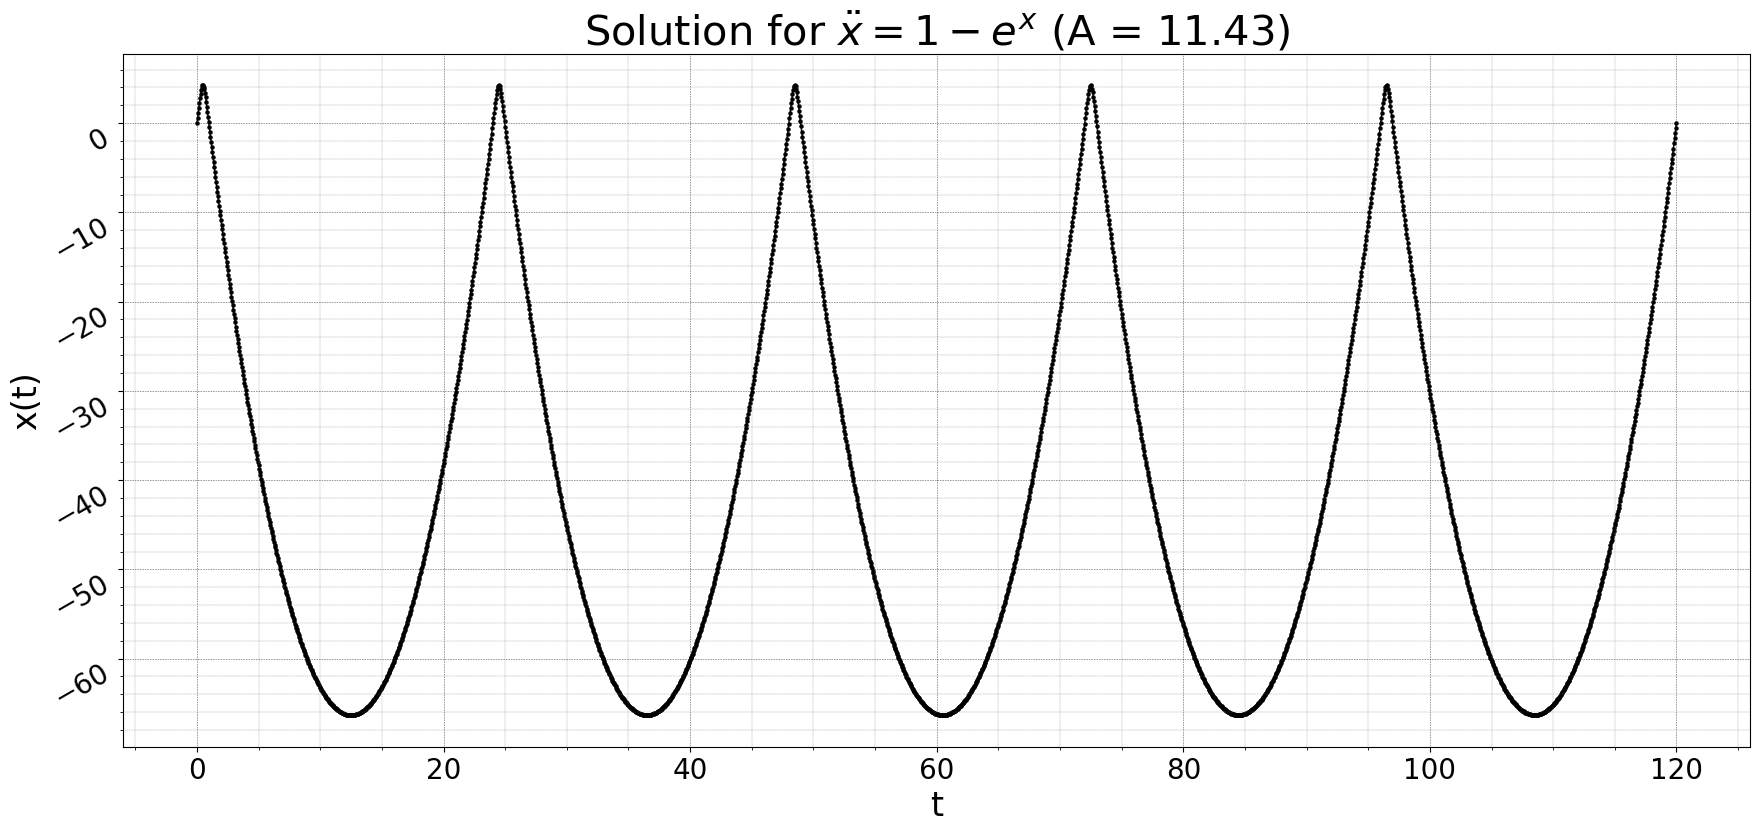

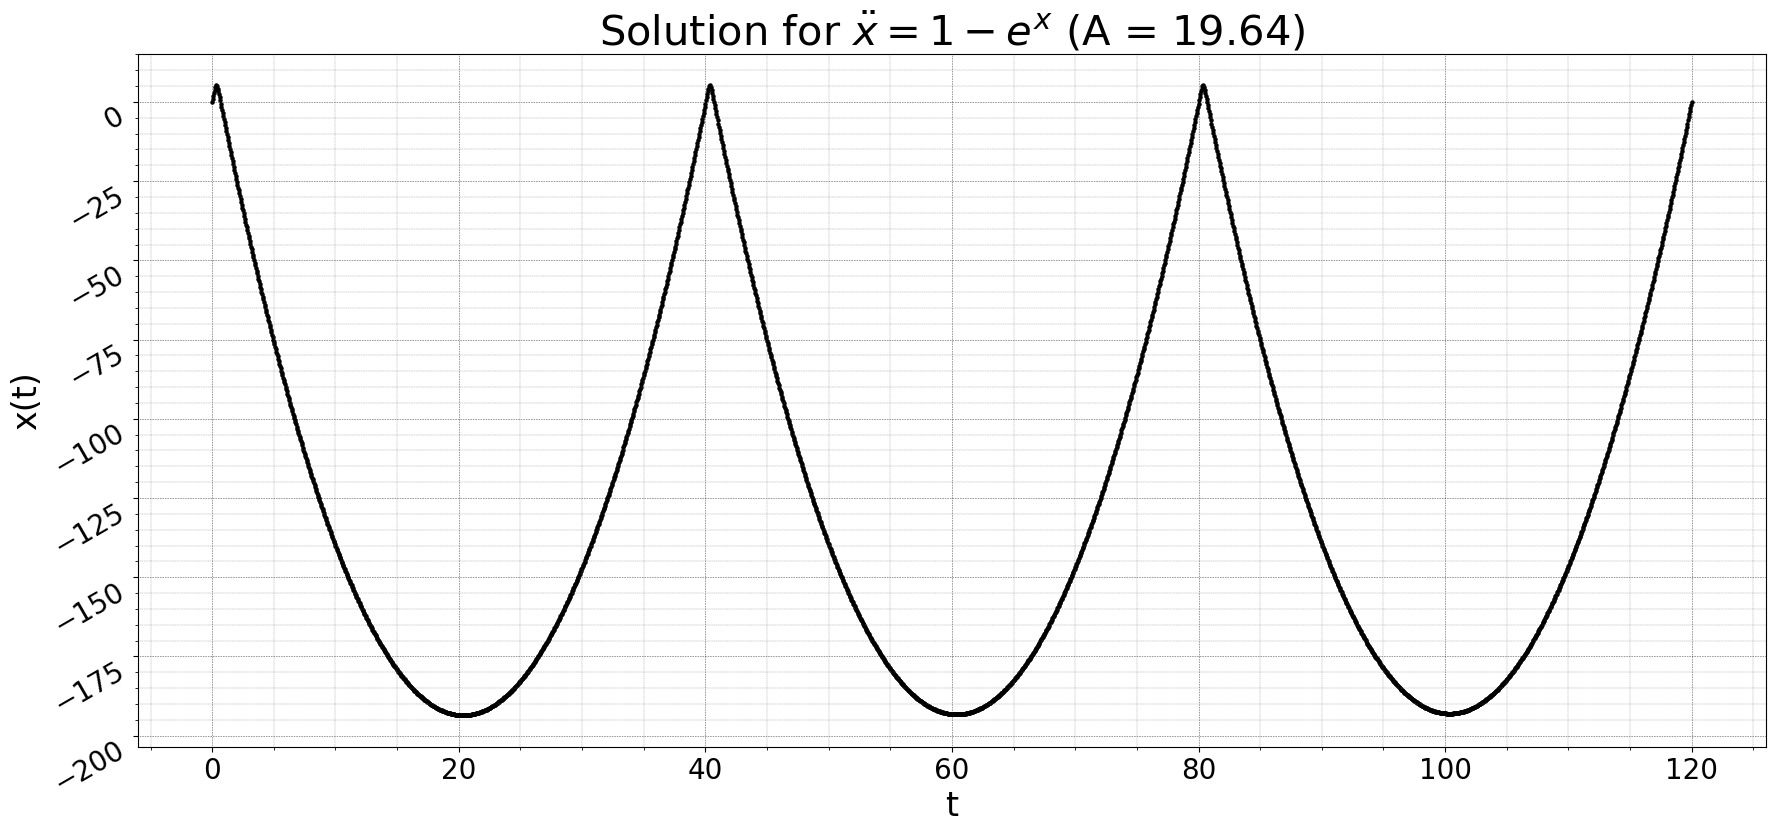

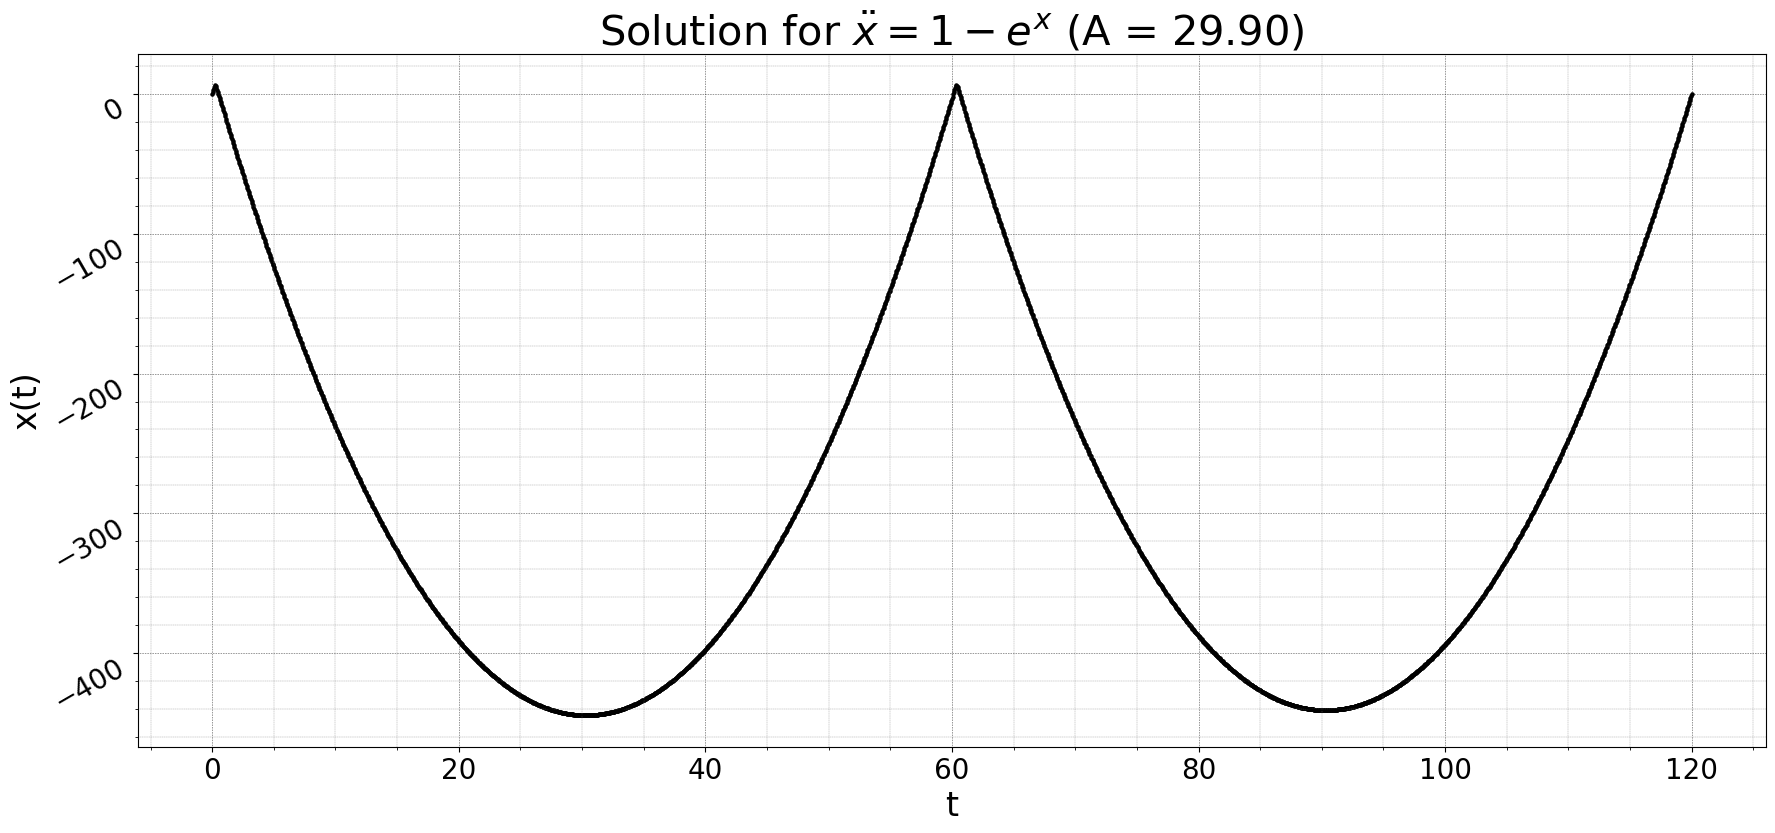

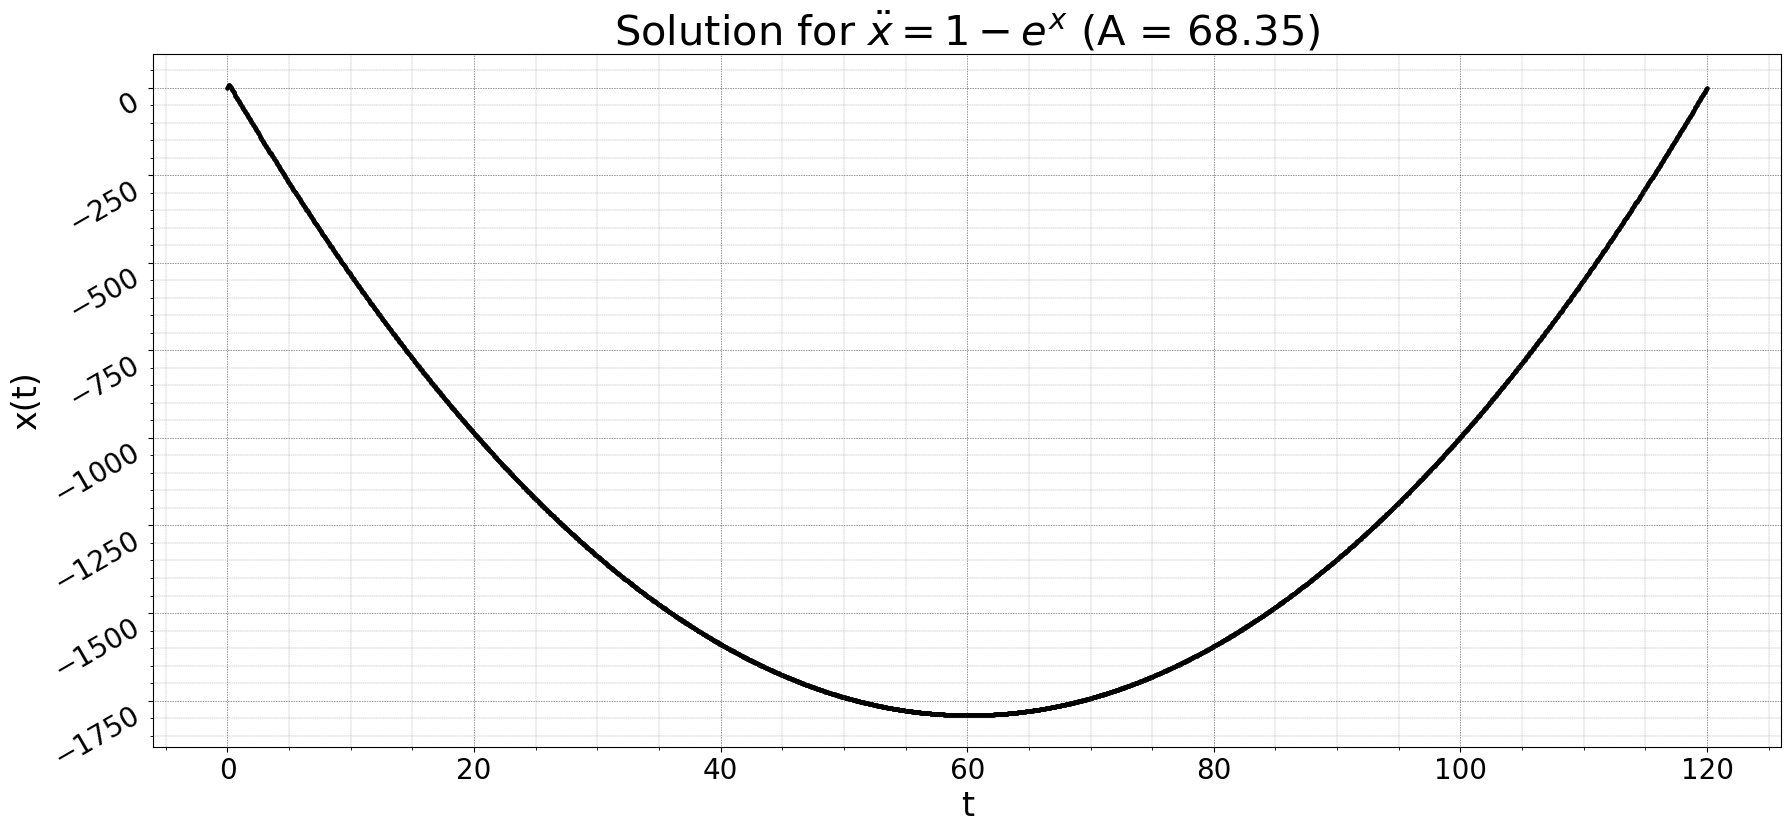

In [15]:
N = 2400
initial_approximations = [11.0, 19.0, 29.0, 68.8] # these values were chosen by precomputing
n_approx = len(initial_approximations)

T = np.empty(shape=(n_approx, N + 1))
X = np.empty(shape=(n_approx, N + 1))
A = np.empty(n_approx)

for i, initial in enumerate(initial_approximations):
    T[i], x, A[i] = shooting_method(F, solve_cauchy, t_1, x_1, t_2, x_2, N, initial)
    X[i] = x.transpose()[1] # we need only x, not its derivative

for t, x, a in zip(T, X, A):
    draw("Solution for $\\ddot{x} = 1 - e^x$ " + f"(A = {a:.2f})", t, "t", x, "x(t)")

I also checked initial values for **fsolve** from 60 to 200 with step of 5. No new solution was found.

All in all, there are only 4 solutions with periods $T \in \{24, 40, 60, 120\}$.

## Tridiagonal matrix method

### Given boundary-value problem

In [16]:
p = lambda x : 0
q = lambda x : -10 - np.sin(2 * np.pi * x)
f = lambda x : np.cos(2 * np.pi * x)

x_1 = 0
x_2 = 1

### Code

In [17]:
def periodic_tridiagonal(p, q, f, x_1, x_2, N):

    a = lambda h, p_n : 1 + (h * p_n) / 2
    b = lambda h, q_n : h**2 * q_n - 2
    c = lambda h, p_n : 1 - (h * p_n) / 2
    d = lambda h, f_n : h**2 * f_n

    x = np.linspace(x_1, x_2, num = N + 1, endpoint = True)
    h = (x_2 - x_1) / N

    alpha = np.empty(N - 1)
    beta = np.empty(N - 2)
    gamma = np.empty(N - 1)

    b_0 = b(h, q(x[0]))
    alpha[0] = d(h, f(x[0])) / b_0
    beta[0] = -a(h, p(x[0])) / b_0
    gamma[0] = -c(h, p(x[0])) / b_0

    for i in range(1, N - 2):

        c_i = c(h, p(x[i]))
        denom = b(h, q(x[i])) + c_i * beta[i - 1]

        alpha[i] = (d(h, f(x[i])) - c_i * alpha[i - 1]) / denom
        beta[i] = -a(h, p(x[i])) / denom
        gamma[i] = -c_i * gamma[i - 1] / denom

    c_N_min_2 = c(h, p(x[N - 2]))
    denom = b(h, q(x[N - 2])) + c_N_min_2 * beta[N - 3]

    alpha[N - 2] = (d(h, f(x[N - 2])) - c_N_min_2 * alpha[N - 3]) / denom
    gamma[N - 2] = -(a(h, p(x[N - 2])) + c_N_min_2 * gamma[N - 3]) / denom

    nu = np.empty(N)
    mu = np.empty(N)

    c_N_min_1 = c(h, p(x[N - 1]))
    denom = b(h, q(x[N - 1])) + c_N_min_1 * gamma[N - 2]

    nu[N - 1] = (d(h, f(x[N - 1])) - c_N_min_1 * alpha[N - 2]) / denom
    mu[N - 1] = -a(h, p(x[N - 1])) / denom
    nu[N - 2] = alpha[N - 2] + gamma[N - 2] * nu[N - 1]
    mu[N - 2] = gamma[N - 2] * mu[N - 1]

    for i in range(N - 3, -1, -1):
        nu[i] = alpha[i] + beta[i] * nu[i + 1] + gamma[i] * nu[N - 1]
        mu[i] = beta[i] * mu[i + 1] + gamma[i] * mu[N - 1]

    y = np.empty(N + 1)

    y[0] = nu[0] / (1 - mu[0])
    for i in range(1, N):
        y[i] = nu[i] + mu[i] * y[0]
    y[N] = y[0]

    return x, y

def naive_method(p, q, f, x_1, x_2, N):

    a = lambda h, p_n : 1 + (h * p_n) / 2
    b = lambda h, q_n : h**2 * q_n - 2
    c = lambda h, p_n : 1 - (h * p_n) / 2
    d = lambda h, f_n : h**2 * f_n

    x = np.linspace(x_1, x_2, num = N + 1, endpoint = True)
    h = (x_2 - x_1) / N

    A = np.zeros(shape=(N, N))
    B = np.empty(N)

    A[0, 0] = b(h, q(x[0]))
    A[0, 1] = a(h, p(x[0]))
    A[0, N - 1] = c(h, p(x[0]))
    B[0] = d(h, f(x[0]))

    for i in range(1, N - 1):
        A[i, i - 1] = c(h, p(x[i]))
        A[i, i] = b(h, q(x[i]))
        A[i, i + 1] = a(h, p(x[i]))
        B[i] = d(h, f(x[i]))

    A[N - 1, 0] = a(h, p(x[N - 1]))
    A[N - 1, N - 2] = c(h, p(x[N - 1]))
    A[N - 1, N - 1] = b(h, q(x[N - 1]))
    B[N - 1] = d(h, f(x[N - 1]))

    y = np.linalg.solve(A, B)
    y = np.append(y, y[0])

    return x, y

### Results

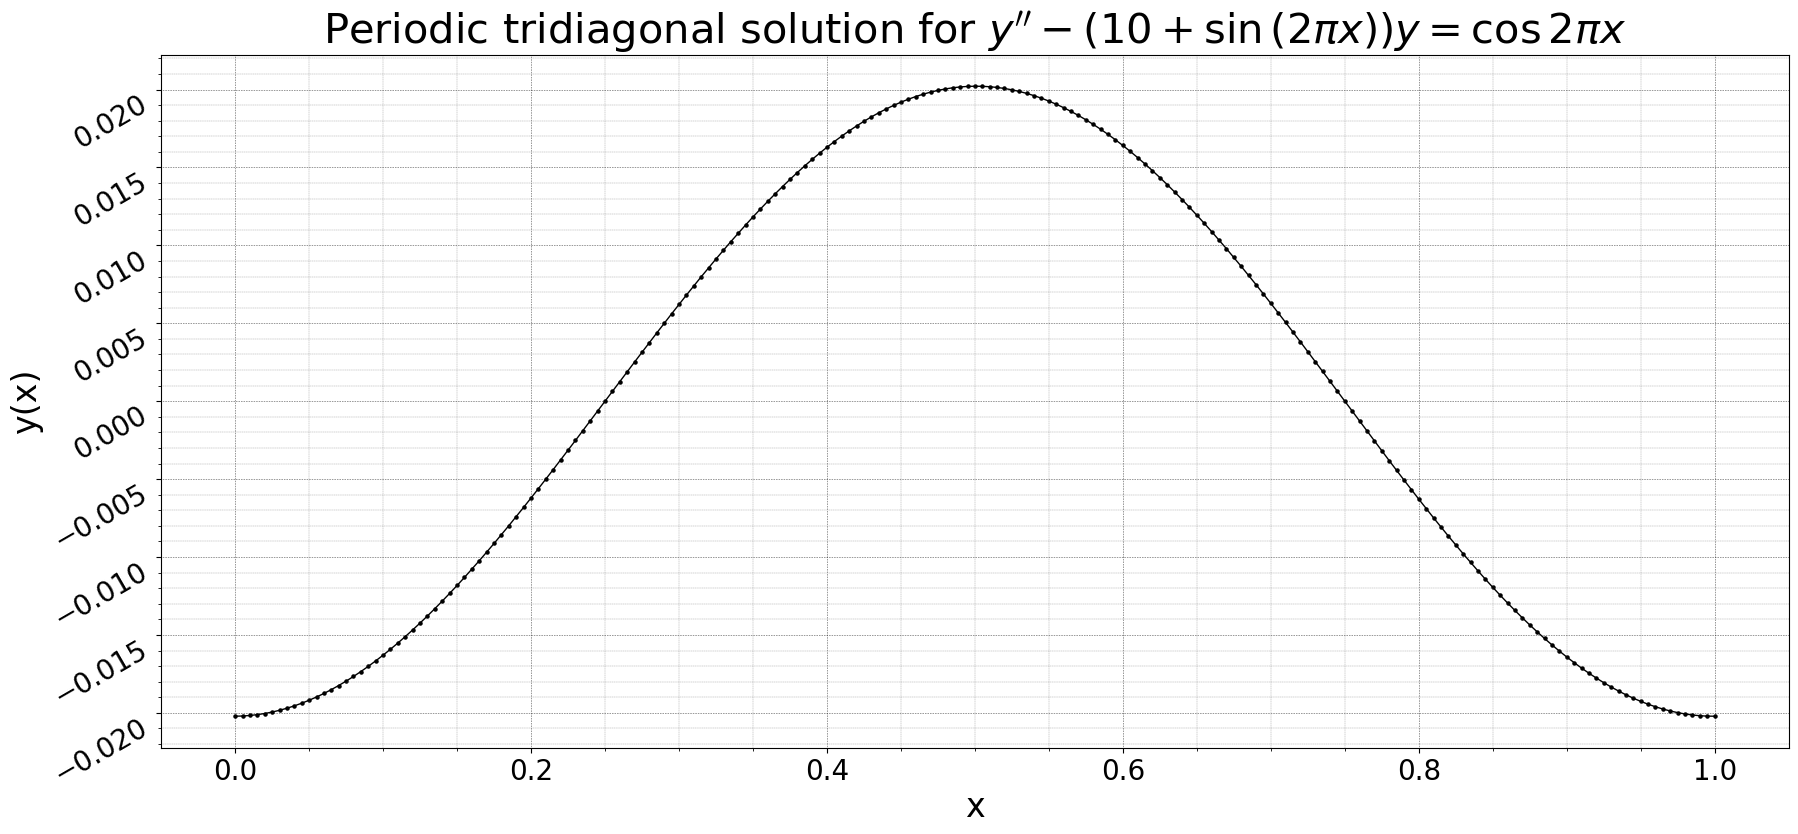

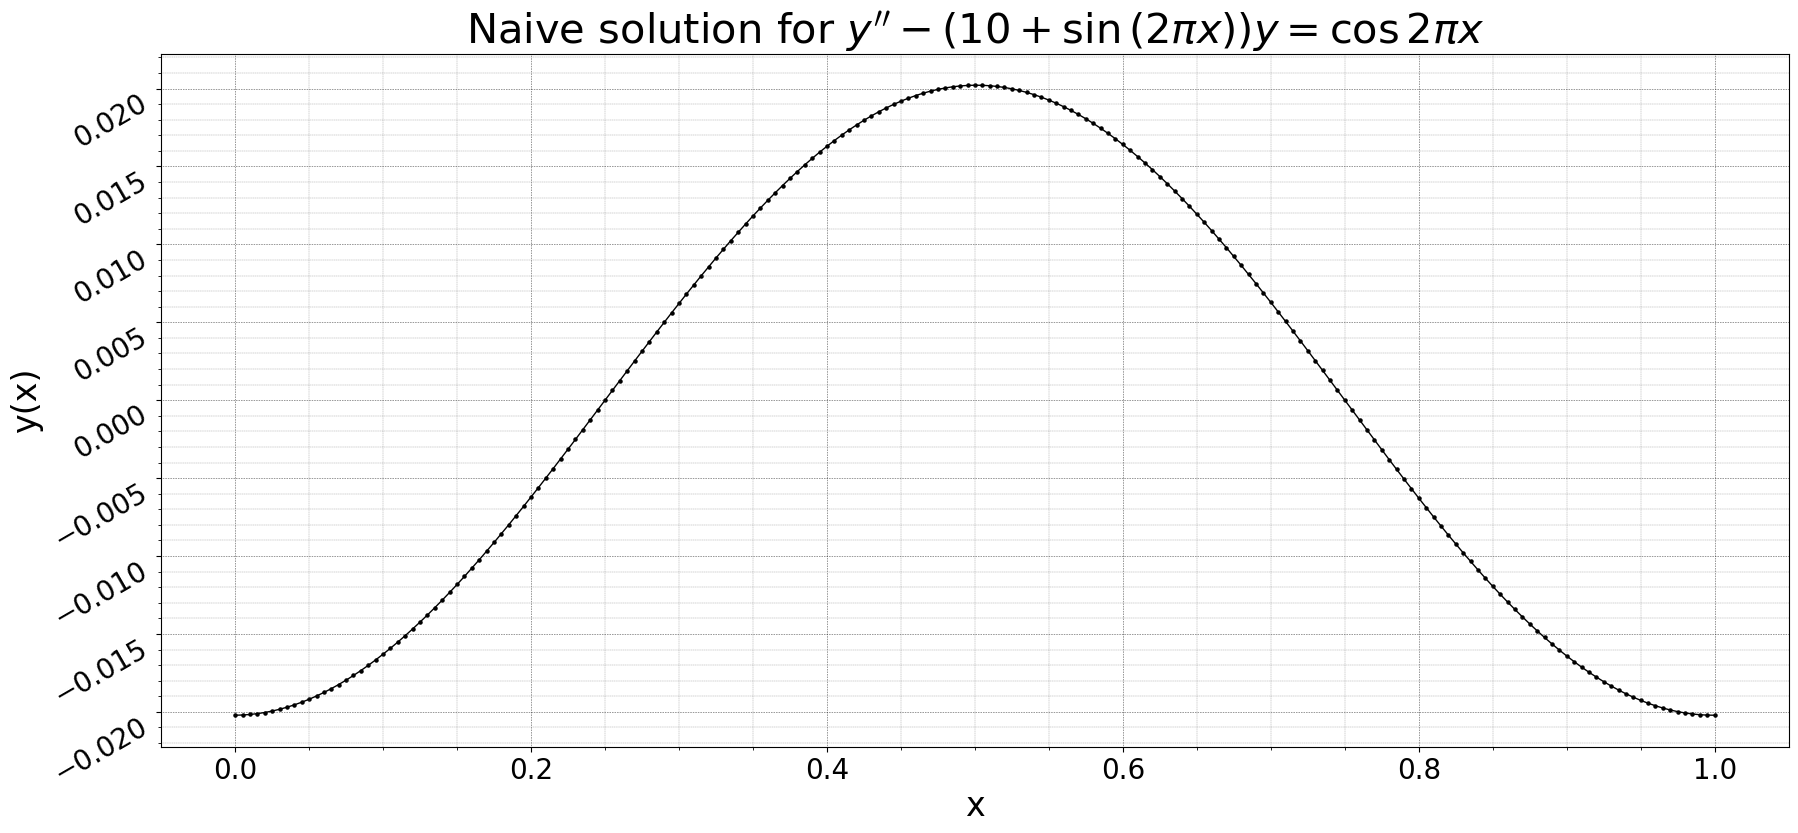

In [18]:
N = 200 # the value was chosen so that h = 0.005
x, y = periodic_tridiagonal(p, q, f, x_1, x_2, N)

draw("Periodic tridiagonal solution for $y'' - (10 + \\sin{(2\pi x)})y = \\cos{2\pi x}$", x, "x", y, "y(x)")

x, y = naive_method(p, q, f, x_1, x_2, N)

draw("Naive solution for $y'' - (10 + \\sin{(2\pi x)})y = \\cos{2\pi x}$", x, "x", y, "y(x)")